In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def basic_check(df):
    '''
    読み込んだデータフレームの
    ・行と列の長さ
    ・各カラムの欠損値の数
    ・各カラムのデータの型
    ・データフレームのレコード先頭から5行、末尾から5行
    を確認する
    '''
    print('行と列の長さ\n{}'.format(df.shape))
    print('-'*50)
    print('各カラムの欠損値の数\n{}'.format(df.isnull().sum()))
    print('-'*50)
    print(df.info())
    display(df.head(), df.tail())

In [3]:
df = pd.read_csv('train.csv')
basic_check(df)

行と列の長さ
(207, 12)
--------------------------------------------------
各カラムの欠損値の数
datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
datetime         207 non-null object
y                207 non-null int64
week             207 non-null object
soldout          207 non-null int64
name             207 non-null object
kcal             166 non-null float64
remarks          21 non-null object
event            14 non-null object
payday           10 non-null float64
weather          207 non-null object
precipitation    207 non-null object
temperature      207 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1


In [4]:
'''度数分布表を作成する関数'''
def create_frequency_distribution(df, col, rename_col):
    '''
    df:該当データフレーム
    col:度数、累積度数、相対度数、累積相対度数を算出したいカラム
    rename_col:reset_indexメソッド後にカラム名[index]から変更したい「名称」
    
    使い方：create_frequency_distribution(df, 'word', '単語')
    '''
    df = df[col].value_counts().reset_index().rename(columns={'index':rename_col, col:'度数'})
    df['累積度数'] = df['度数'].cumsum()
    df['相対度数'] = round((df['度数'] / sum(df['度数'])), 3)
    df['累積相対度数'] = round((df['累積度数'] / sum(df['度数'])), 3)
    return df

In [5]:
f_df = create_frequency_distribution(df, 'weather', '天気')
f_df

,天気,度数,累積度数,相対度数,累積相対度数
0,曇,53,53,0.256,0.256
1,快晴,53,106,0.256,0.512
2,晴れ,50,156,0.242,0.754
3,薄曇,25,181,0.121,0.874
4,雨,24,205,0.116,0.990
5,雷電,1,206,0.005,0.995
6,雪,1,207,0.005,1.000


In [6]:
"度数の大きさ上位○○個を可視化する関数"
def create_barh_top_num_graph(df, col, threshold,  col2='度数',  fontsize=20, yoko=20, tate=60):
    '''
    df:該当データフレーム
    col:y軸(横棒グラフのとき)にしたいカラム
    threshold:「値の大きさ上位○○個」の○○部分
    col2:x軸(横棒グラフのとき)にしたいカラム
    fontsize:x軸、y軸の文字ラベルのサイズ
    yoko:グラフの横幅
    tate:グラフの縦幅
    
    使い方：create_barh_top_num_graph(std_df2, '単語', 100, col2='tf_idf')
    '''
    plt.rcParams["font.size"] = fontsize
    df = df[0:threshold][[col, col2]].sort_values(col2, ascending=True)

    return df.set_index(col).plot.barh(figsize=(yoko, tate), fontsize=fontsize)

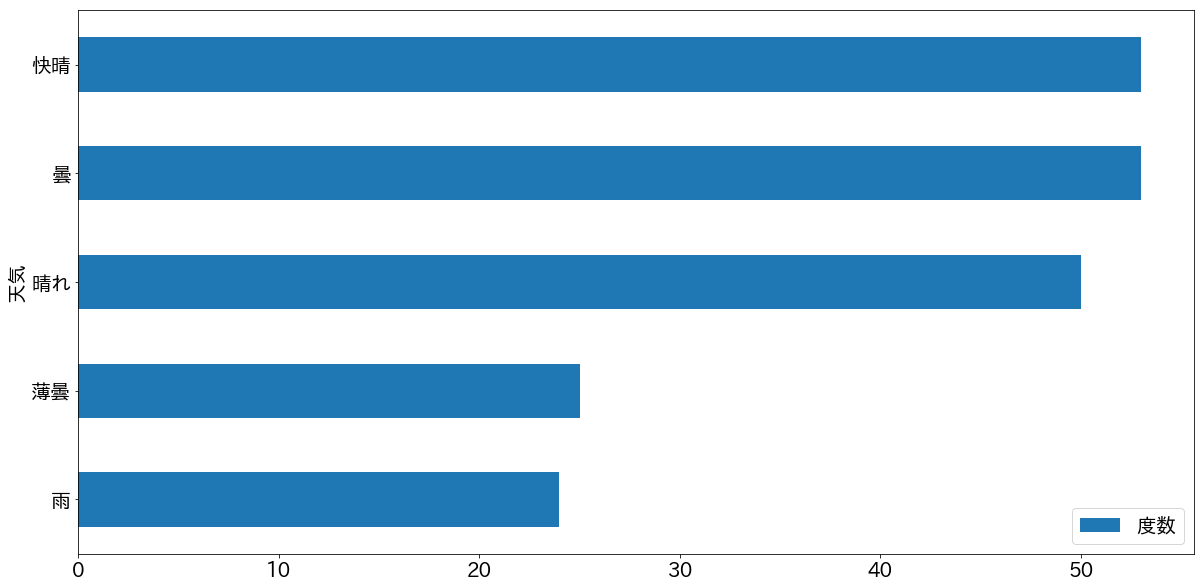

In [7]:
create_barh_top_num_graph(f_df, '天気', 5, yoko=20, tate=10)